# TASK 2

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-iqk9q_hy because the default path (/home/group_3/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.50188074]
 [0.502105  ]
 [0.50201217]
 [0.50220438]]


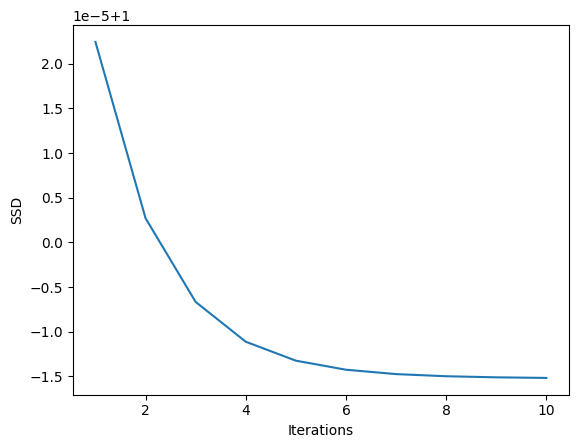

The lowest SSD is: 0.9999848261078346


In [1]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt


# Sigmoid function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


# Derivative of Sigmoid function for backprop
def sigmoid_derivative(x):
    return x * (1.0 - x)


# Define the neural network
class NeuralNetwork:
    def __init__(self, x, y, n):
        self.input = x
        self.neuron = n
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron)  # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)  # N neurons connected to output
        self.y = y
        self.output = np.zeros(self.y.shape)  # instantiating the output

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # Weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2


iterations = 10
n_unit = 1
Input = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
Target = np.array([[0], [1], [1], [0]])
model = NeuralNetwork(Input, Target, n_unit)
SSD = []
for i in range(iterations):
    model.feedforward()
    model.backprop()
    errors = (Target - model.output) ** 2
    SSD.append(np.sum(errors))  # Objective(loss) function
Itr = np.linspace(1, len(SSD), len(SSD))
plt.plot(Itr, SSD)
plt.xlabel('Iterations')
plt.ylabel('SSD')

# Print the results
print("The target values are:", Target)
print("The predicted values are:", model.output)
plt.show()
print("The lowest SSD is:", min(SSD))